# Classification Project
## Salaries prediction with 'Adult' dataset <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Adult

#### Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. Prediction task is to determine whether a person makes over 50K a year. <br>

### Attribute Information: 

<b>age:</b> continuous. <br>
<b>workclass:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>
<b>fnlwgt:</b> continuous. Final weight, which is the number of units in the target population that the responding unit represents. <br>
<b>education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
<b>education-num:</b> continuous. : The highest level of education achieved in numerical form. <br>
<b>marital-status:</b> Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
<b>occupation:</b> Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
<b>relationship:</b> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
<b>race:</b> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
<b>sex:</b> Female, Male. <br>
<b>capital-gain:</b> continuous. <br>
<b>capital-loss:</b> continuous. <br>
<b>hours-per-week:</b> continuous. <br>
<b>native-country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Basic libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Importing the data:

Training data:

In [3]:
df_training_original = pd.read_csv('training.data', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Test data:

In [4]:
df_test_original = pd.read_csv('test.test', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Making a copy of the original imported data:

In [5]:
df_test = df_test_original.copy()
df_training = df_training_original.copy()

Check the data:

In [6]:
df_training

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_test

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Exploratory Data Analysis (EDA):

Training data:

In [8]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Week-Hours      32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Test data:

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   FNLWGT          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital-status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Week-Hours      16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Descriptions of basic statistics:

In [10]:
df_training.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df_test.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


Basic check for missing values (further checks will show that there actually ARE missing values, just marked with "?" as a placeholder):

In [12]:
df_training.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

In [13]:
df_test.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

Correlation between the variables:

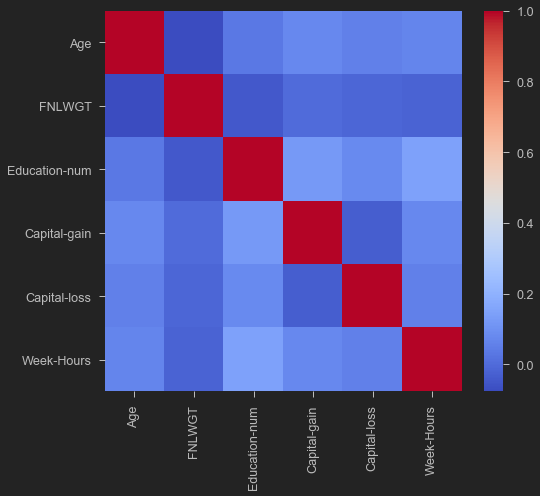

In [14]:
sns.heatmap(df_training.corr(), cmap='coolwarm')

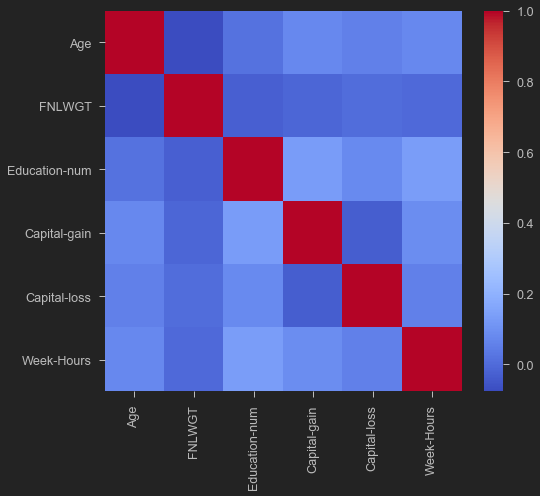

In [15]:
sns.heatmap(df_test.corr(), cmap='coolwarm')

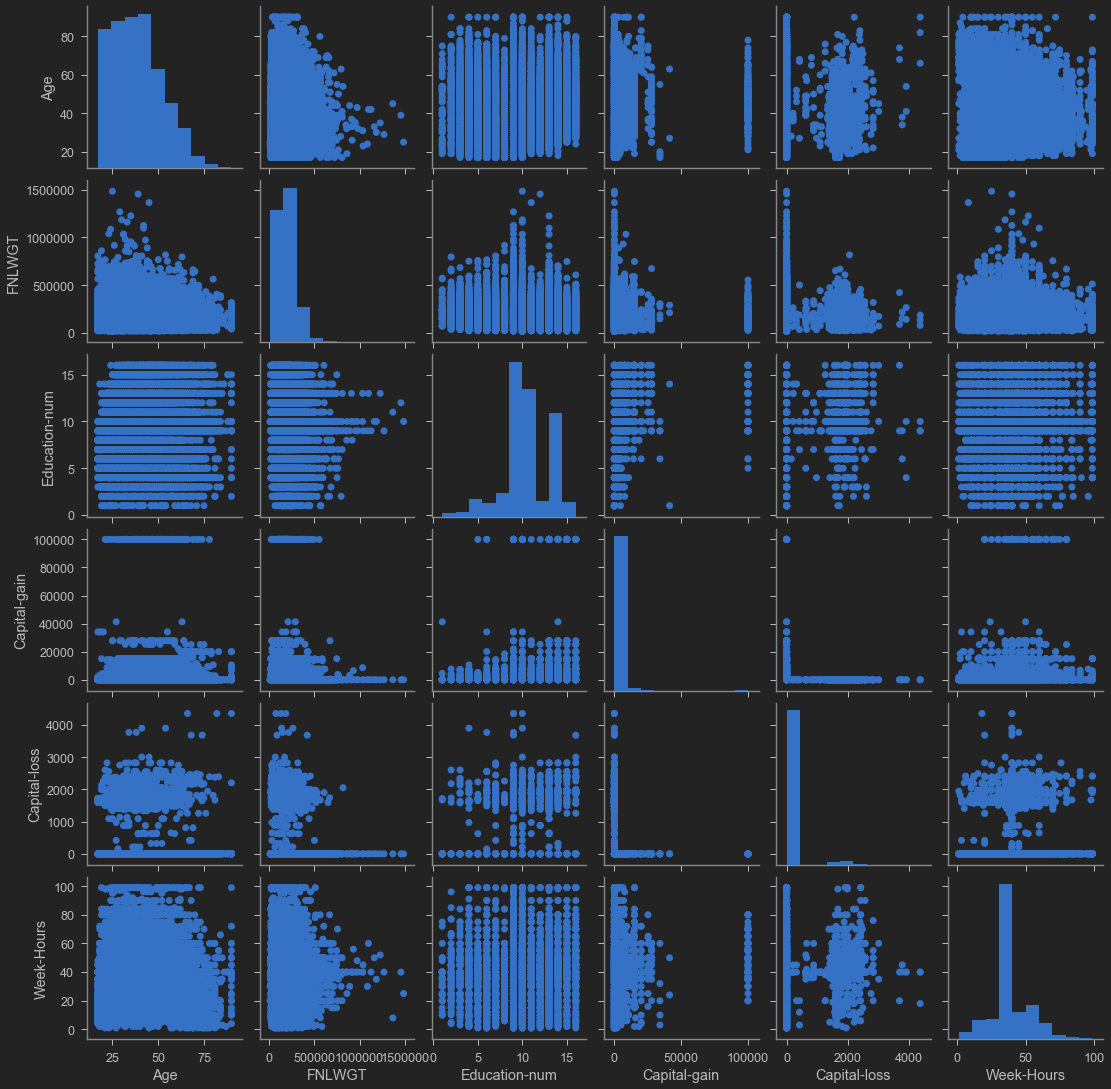

In [16]:
sns.pairplot(df_training, plot_kws=dict(edgecolor="none"))

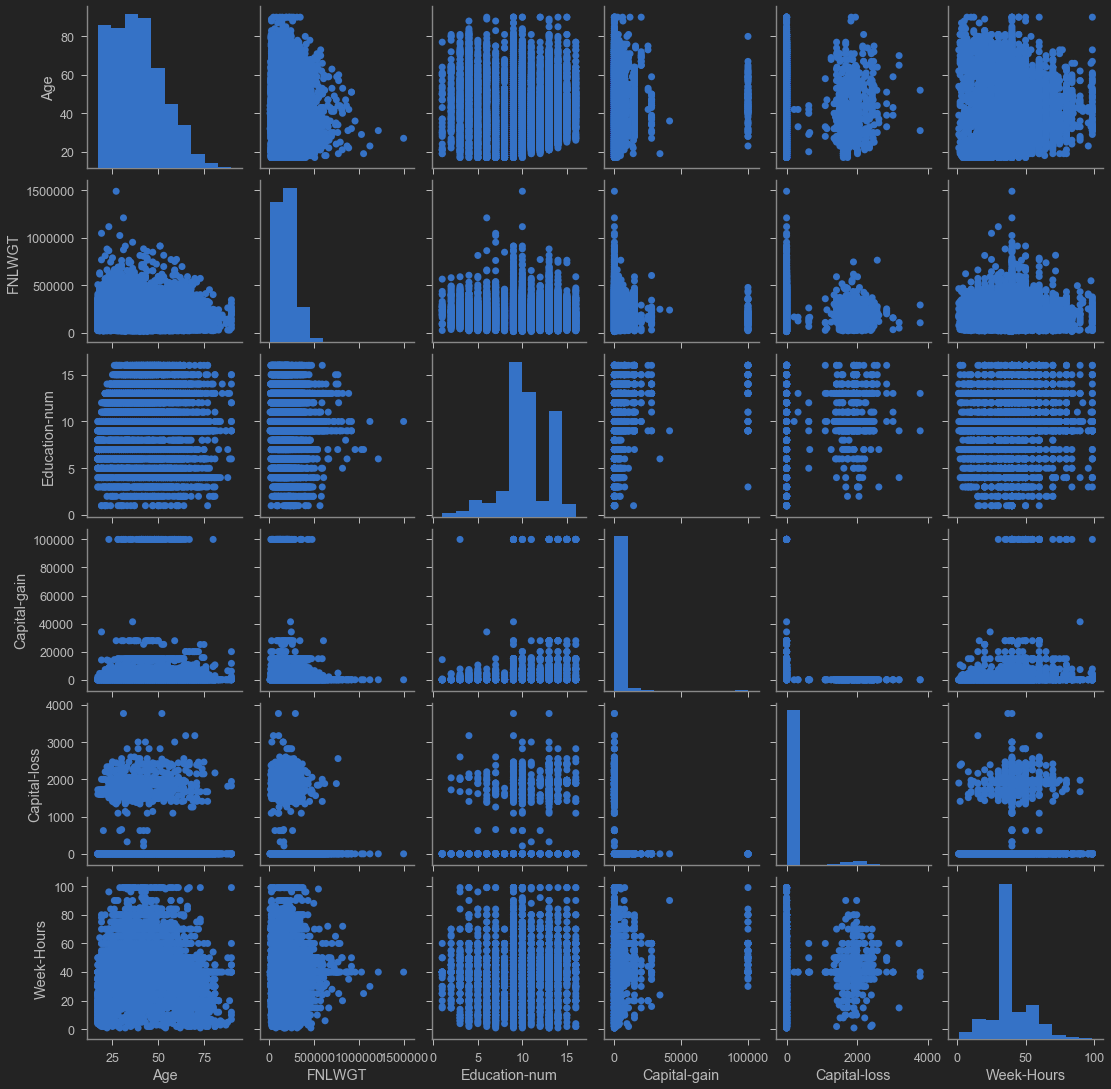

In [17]:
sns.pairplot(df_test, plot_kws=dict(edgecolor="none"))

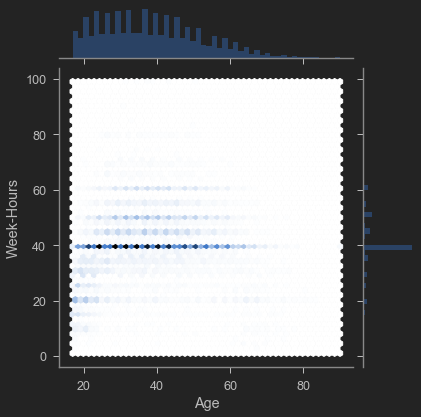

In [18]:
sns.jointplot(x='Age',y='Week-Hours',data=df_training, kind='hex');

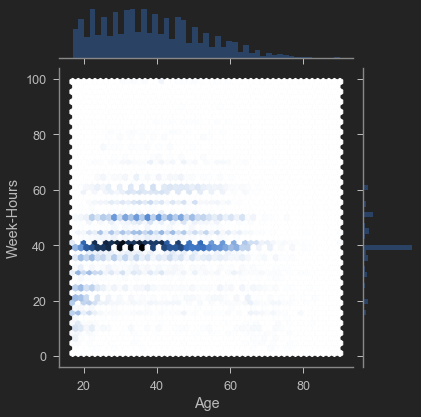

In [19]:
sns.jointplot(x='Age',y='Week-Hours',data=df_test, kind='hex');

## Concatenating Training and Test sets
For clarity and consistent pre-processing I decided to temporary concatenate training and test dataframes that initially came separately from UCI. I will split them again before the training.

In [56]:
#Test set:
#df.iloc[32561:,:]

In [59]:
df = pd.concat([df_training, df_test], ignore_index=True)

In [60]:
df.dtypes

Age                int64
Workclass         object
FNLWGT             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Week-Hours         int64
Native-country    object
Salary            object
dtype: object

## Missing data
Even though there are no missing values from .isnull() and .info() methods we can see "?" in some cells. 
Although the data is theoretically indeed not missing there, the "?" placeholder does not add any value. There can be many different placeholders so just searching for "?" might not be sufficient. Let's inspect the columns for suspicious values:

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   FNLWGT          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Week-Hours      48842 non-null  int64 
 13  Native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [62]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

In [63]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df['Education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: Education, dtype: int64

In [27]:
df['Education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [28]:
df['Marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [30]:
df['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [31]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [32]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [33]:
df['Capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: Capital-gain, Length: 123, dtype: int64

Whereas 0s are possible, the 244 instances of 99999s look suspicious and are probably just a placeholder for missing values.

In [34]:
df['Capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: Capital-loss, Length: 99, dtype: int64

In [35]:
df['Week-Hours'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69], dtype=int64)

In [36]:
df['Native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
df['Salary'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

## Replace "?" with NaN

In [38]:
df = df.replace({' ?': np.nan})

In [39]:
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Inspecting really missing values:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   FNLWGT          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Week-Hours      48842 non-null  int64 
 13  Native-country  47985 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [41]:
df.isnull().sum()

Age                  0
Workclass         2799
FNLWGT               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Week-Hours           0
Native-country     857
Salary               0
dtype: int64

In conclusion, there are missing values in the following columns: 'Workclass', 'Occupation', 'Native-country'. The rows are exactly:

In [42]:
df[df.isnull().any(axis=1)]

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


## Categorical Imputing using SimpleImputer
Using "most frequent" value method in this case: <br>
Note: SimpleImputer returns an array and we loose column types (to be adressed a few lines below):

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Simple Imputer gives back a numpy array. Re-initializing a new dataframe results in loosing the dtypes of the initial columns:

In [44]:
df.dtypes

Age               object
Workclass         object
FNLWGT            object
Education         object
Education-num     object
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain      object
Capital-loss      object
Week-Hours        object
Native-country    object
Salary            object
dtype: object

Assigning back the numerical columns so that e.g. mean() etc. can be used:

In [45]:
df['Age'] = df['Age'].astype(int)
df['FNLWGT'] = df['FNLWGT'].astype(int)
df['Education-num'] = df['Education-num'].astype(int)
df['Capital-gain'] = df['Capital-gain'].astype(int)
df['Capital-loss'] = df['Capital-loss'].astype(int)
df['Week-Hours'] = df['Week-Hours'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int32 
 1   Workclass       48842 non-null  object
 2   FNLWGT          48842 non-null  int32 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int32 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int32 
 11  Capital-loss    48842 non-null  int32 
 12  Week-Hours      48842 non-null  int32 
 13  Native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.5+ MB


## Data exploration:

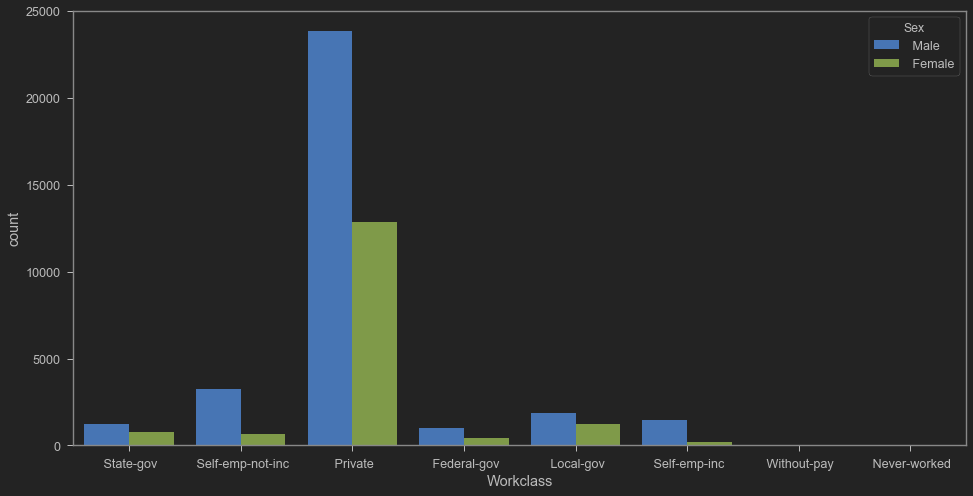

In [47]:
plt.figure(figsize=(16,8))
sns.countplot(df['Workclass'], hue=df['Sex'])

The dataset represent mostly men, employed in private companies.

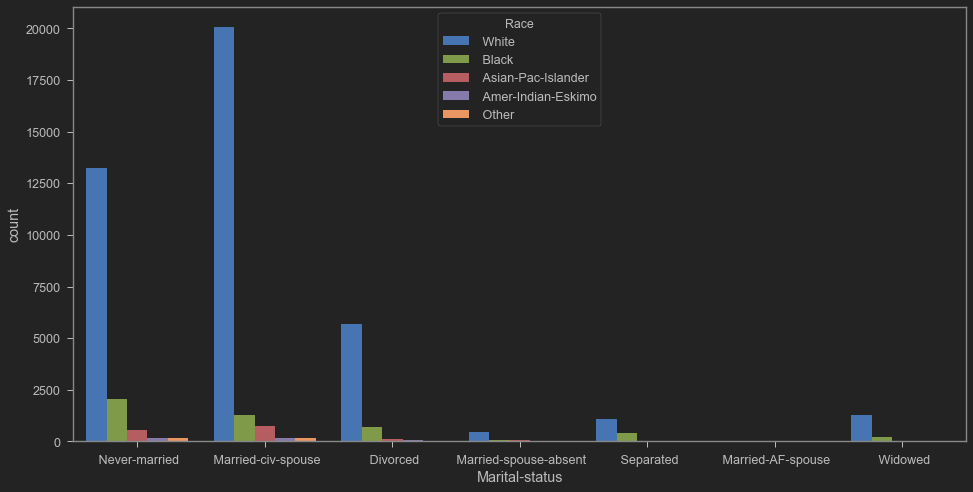

In [75]:
plt.figure(figsize=(16,8))
sns.countplot(df['Marital-status'], hue=df['Race'])

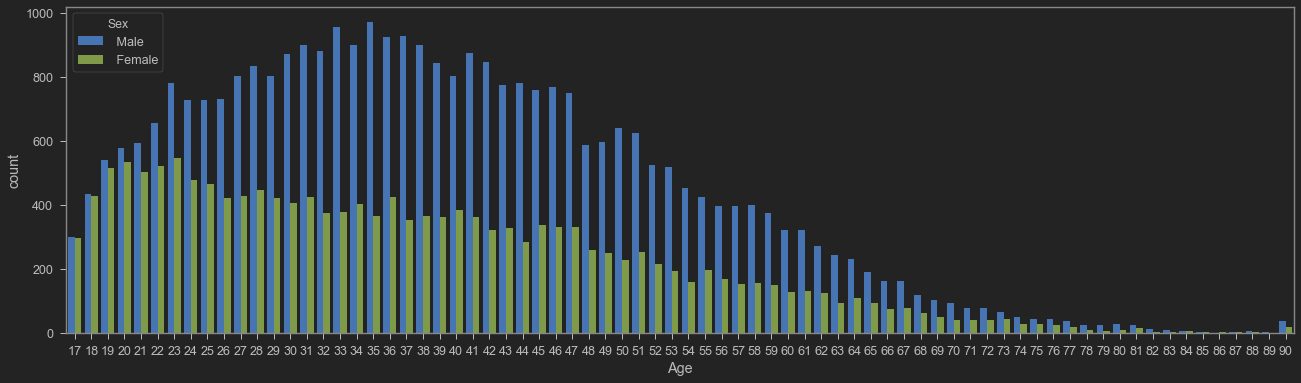

In [49]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Sex'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int32 
 1   Workclass       48842 non-null  object
 2   FNLWGT          48842 non-null  int32 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int32 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int32 
 11  Capital-loss    48842 non-null  int32 
 12  Week-Hours      48842 non-null  int32 
 13  Native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.5+ MB


In [51]:
df.groupby('Age')['FNLWGT'].mean()

Age
17    179157.852101
18    193421.075406
19    204916.851852
20    198076.513028
21    200227.520985
          ...      
86    149912.000000
87    110402.333333
88    149540.666667
89     90972.500000
90    170346.181818
Name: FNLWGT, Length: 74, dtype: float64

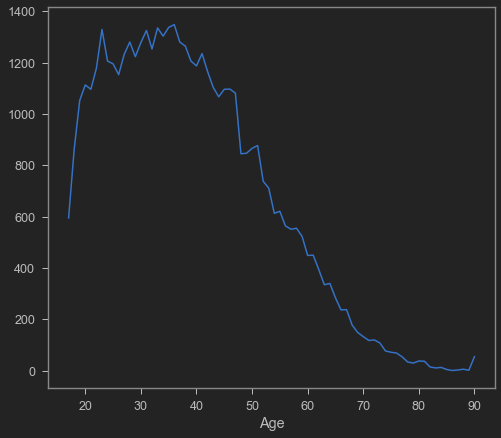

In [73]:
df.groupby('Age')['Salary'].count().plot()

### Scaling the data
Not a must in logistic regression. Needed for KNN, SVM and Kernel-SVM because they are distance-based.